In [2]:
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

### original dataset

In [3]:
df = pd.read_table('cmu_dataset/movie.metadata.tsv', names=['Wikipedia_ID', 'Freebase_ID', 'Name', 'Release_Date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'])

In [4]:
df.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [5]:
def remove_id(s):
    res = ast.literal_eval(s)
    val = list(res.values())[:]
    return str(val)

def remove_language(s, pattern=' language'):
    s = ast.literal_eval(s)
    lang_clean=[]
    for lang in s:
        lang = lang.lower()
        lang_clean.append(str(lang).replace(pattern, ''))
    return str(lang_clean)

def remove_special_character(s):
    s = ast.literal_eval(s)
    tup_s = str(tuple(s))
    s = re.sub("[()']", '', tup_s)
    s = s.rstrip(',')
    s = s.lower()
    return str(s)



"""
test = str(['Thriller'])
print(remove_special_character(test))
print(len(remove_special_character(test)))

test = str(['English Language', 'Norwegian Language'])
print(test)
print(remove_language(test))
"""

"\ntest = str(['Thriller'])\nprint(remove_special_character(test))\nprint(len(remove_special_character(test)))\n\ntest = str(['English Language', 'Norwegian Language'])\nprint(test)\nprint(remove_language(test))\n"

In [6]:
df_copy = df.copy(deep=True)
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_id(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_language(x))
df_copy.Languages = df_copy.Languages.apply(lambda x: remove_special_character(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_id(x))
df_copy.Countries = df_copy.Countries.apply(lambda x: remove_special_character(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_id(x))
df_copy.Genres = df_copy.Genres.apply(lambda x: remove_special_character(x))

In [7]:
df_copy.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,english,united states of america,"mystery, biographical film, drama, crime drama"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,norwegian,norway,"crime fiction, drama"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,german,germany,drama


In [8]:
#pd.set_option("display.max_rows", None)
df_copy.value_counts("Languages")

Languages
english                                                               33748
                                                                      13866
hindi                                                                  3093
spanish                                                                2633
silent film, english                                                   2297
                                                                      ...  
hindi, arabic, urdu, english, punjabi                                     1
hindi, arabic                                                             1
chinese, standard cantonese, standard mandarin, english, cantonese        1
hiligaynon                                                                1
zulu, xhosa, afrikaans, sotho, english, chewa                             1
Name: count, Length: 1814, dtype: int64

In [9]:
#df_copy = df_copy[df_copy['Revenue'].notna()]

#print(f"Length before removing Nan in Revenue column {len(df)}")
#print(f"Length after removing Nan in Revenue {len(df_copy)}")

#reduction = (len(df) - len(df_copy))/len(df)

#print(f"Data reduction of {reduction:.2%}")

In [10]:
df_copy.value_counts("Countries")

Countries
united states of america                         30300
india                                             8240
                                                  8154
united kingdom                                    5343
japan                                             2242
                                                 ...  
france, west germany, united kingdom, germany        1
france, west germany, united kingdom                 1
france, west germany, scotland                       1
france, west germany, italy, canada                  1
zimbabwe, germany                                    1
Name: count, Length: 2124, dtype: int64

In [11]:
countries_counts = df_copy['Countries'].str.split(', ').explode().value_counts()
print(f"Total number of countries : {len(countries_counts)}")

count_threshold = 100
filt_countries_count = countries_counts[countries_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_countries_count)}")

Total number of countries : 147
Number of countries with more than 100 counts : 53


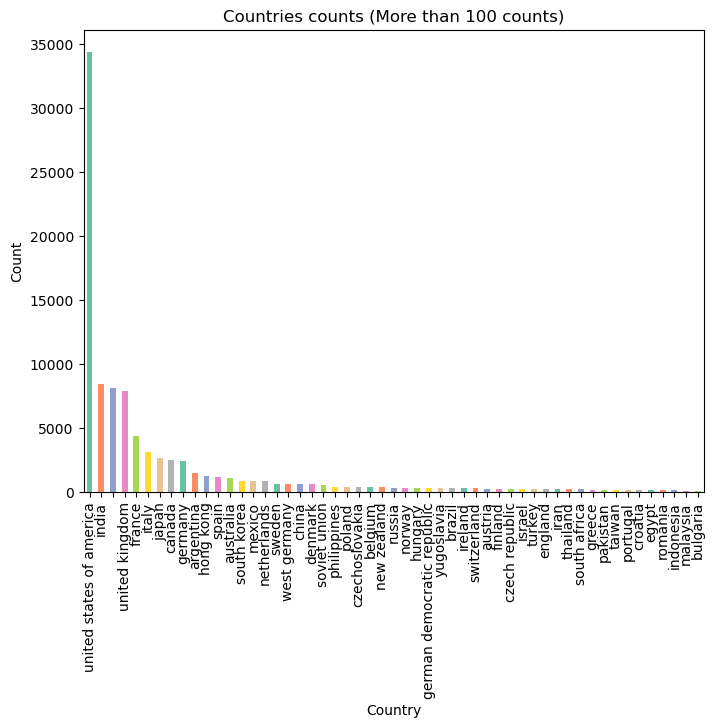

In [12]:
colors = sns.color_palette("Set2", len(filt_countries_count))
plt.figure(figsize=(8, 6))
filt_countries_count.plot(kind='bar', color=colors)
plt.title(f'Countries counts (More than {count_threshold} counts)')
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [13]:
languages_counts = df_copy['Languages'].str.split(', ').explode().value_counts()
print(f"Total number of languages : {len(languages_counts)}")

count_threshold = 40
filt_languages_counts = languages_counts[languages_counts > count_threshold]
print(f"Number of countries with more than {count_threshold} counts : {len(filt_languages_counts)}")

Total number of languages : 211
Number of countries with more than 40 counts : 61


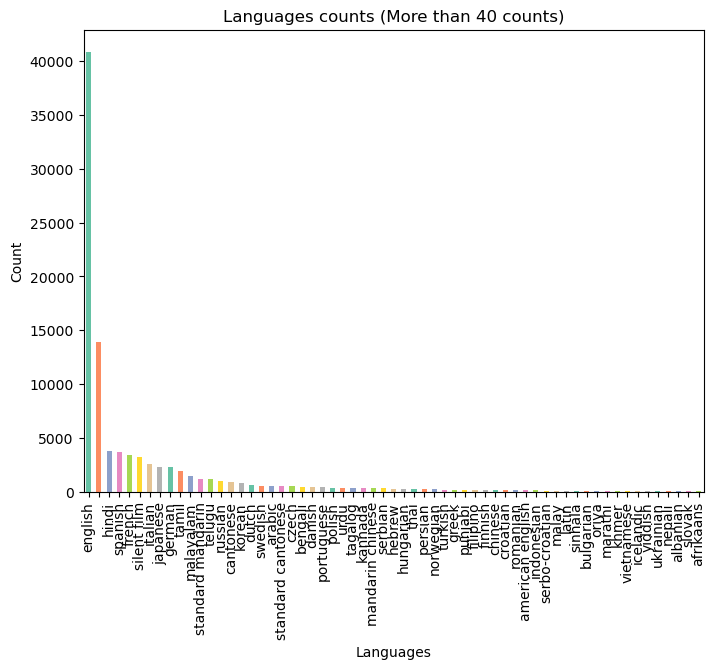

In [14]:
colors = sns.color_palette("Set2", len(filt_languages_counts))
plt.figure(figsize=(8, 6))
filt_languages_counts.plot(kind='bar', color=colors)
plt.title(f'Languages counts (More than {count_threshold} counts)')
plt.xlabel("Languages")
plt.ylabel("Count")
plt.show()

In [15]:
def keep_year(s):
    s = str(s)
    #print(s)
    if s == 'nan': 
        #print('yea')
        return
    #print(type(int(s[:4])))
    return int(s[:4])

def filter_year(year):
    if year < 1800:
        return False
    return True


"""
test = "2005-09-09"

print(keep_year(test))
"""

'\ntest = "2005-09-09"\n\nprint(keep_year(test))\n'

In [16]:
#df_copy = df_copy[df_copy['Release_Date'].notna()]
df_copy.Release_Date = df_copy.Release_Date.apply(lambda x: keep_year(x))
df_copy = df_copy[df_copy['Release_Date'].apply(lambda x: filter_year(x))]
df_copy.head()

,Wikipedia_ID,Freebase_ID,Name,Release_Date,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,english,united states of america,"mystery, biographical film, drama, crime drama"
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83.0,norwegian,norway,"crime fiction, drama"
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,german,germany,drama


In [17]:
print(f"Minimum year is {df_copy.Release_Date.min()}")
print(f"Maximum year is {df_copy.Release_Date.max()}")

Minimum year is 1888.0
Maximum year is 2016.0


In [18]:
print(f"Minimum revenue is {df_copy.Revenue.min()}")
print(f"Maximum revenue is {df_copy.Revenue.max()}")

Minimum revenue is 10000.0
Maximum revenue is 2782275172.0


In [19]:
df_copy = df_copy.drop('Wikipedia_ID', axis=1)
df_copy = df_copy.drop('Runtime', axis=1)
#df_copy = df_copy.drop('Genres', axis=1)
df_copy.head()

,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,Genres
0,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,english,united states of america,"thriller, science fiction, horror, adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,english,united states of america,"mystery, biographical film, drama, crime drama"
2,/m/0crgdbh,Brun bitter,1988.0,NaN,norwegian,norway,"crime fiction, drama"
3,/m/0285_cd,White Of The Eye,1987.0,NaN,english,united kingdom,"thriller, erotic thriller, psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983.0,NaN,german,germany,drama


In [20]:
print(len(df_copy))

81740


In [21]:
df_copy.to_csv('../../data/cmu_cleaned.csv', index=False)

In [22]:
import pandas as pd
import json

# Load the data into a DataFrame
df_tropes = pd.read_csv('cmu_dataset/tvtropes.clusters.txt', sep='\t', names=['category', 'details'])

# Convert the JSON strings in the 'details' column to dictionaries
df_tropes['details'] = df_tropes['details'].apply(json.loads)

# Use json_normalize to expand the JSON fields
details_df = pd.json_normalize(df_tropes['details'])

# Concatenate the 'category' column with the expanded JSON DataFrame
final_df_tropes = pd.concat([df_tropes[['category']], details_df], axis=1)

final_df_tropes = final_df_tropes.drop(columns=['char', 'id', 'actor'])
final_df_tropes = final_df_tropes[['movie', 'category']]
final_df_tropes = final_df_tropes.rename(columns={'movie':'Name', 'category':'Tropes'})
final_df_tropes.head()

,Name,Tropes
0,Flubber,absent_minded_professor
1,Richie Rich,absent_minded_professor
2,The Shadow,absent_minded_professor
3,Them!,absent_minded_professor
4,Stargate,absent_minded_professor


In [23]:
#final_df.Tropes.value_counts()
print(len(df))

81741


In [24]:
final_df_tropes['Name'] = final_df_tropes['Name'].str.lower()
final_df_tropes.head()

,Name,Tropes
0,flubber,absent_minded_professor
1,richie rich,absent_minded_professor
2,the shadow,absent_minded_professor
3,them!,absent_minded_professor
4,stargate,absent_minded_professor


## Adding Tropes to the cmu dataset

In [25]:
# cmu = 81740
# trope = 501
df_copy['Name'] = df_copy['Name'].str.lower()
tropes_merge = pd.merge(df_copy, final_df_tropes, how='outer', on=['Name'])
tropes_merge.shape
tropes_merge.sample(10)

,Freebase_ID,Name,Release_Date,Revenue,Languages,Countries,Genres,Tropes
17744,/m/0glpznb,disturbed,1990.0,NaN,english,,horror,NaN
81628,/m/07qyc4,ziegfeld follies,1945.0,NaN,english,united states of america,"musical, comedy, musical comedy",NaN
43925,/m/0gmfrpz,new year baby,2007.0,NaN,,united states of america,documentary,NaN
7798,/m/09mzsl,beauty and warrior,2002.0,NaN,english,indonesia,"short film, family film, action, animation",NaN
31043,/m/0df2zx,jackass: number two,2006.0,84618532.0,english,united states of america,"extreme sports, sports, comedy, slapstick, blo...",NaN
18046,/m/02pxhth,dolphins,2007.0,NaN,english,united kingdom,"romance film, action, drama",NaN
8870,/m/06407b7,bindhaast,1999.0,NaN,,india,"thriller, mystery, adventure",NaN
68367,/m/0h51mcm,the miner's curse,1911.0,NaN,silent film,,silent film,NaN
77404,/m/0hrf_pc,uranium boom,1956.0,NaN,,united states of america,"drama, adventure",NaN
41235,/m/01scf3,mobile suit gundam f91,1991.0,NaN,"japanese, english",japan,"science fiction, anime, japanese movies",NaN


## Add columns for gross, local budget using movie_budjets
github: https://github.com/ntdoris/movie-revenue-analysis/tree/main 
in case interested in other files such as ratings, reviews, and other info

In [26]:
df_cmu = tropes_merge.copy(deep=True)
df_cmu = df_cmu.drop('Freebase_ID', axis=1)
df_cmu = df_cmu.rename(columns={'Release_Date': 'Year', 'Revenue': 'worldwide_gross'})
df_cmu

,Name,Year,worldwide_gross,Languages,Countries,Genres,Tropes
0,,1916.0,NaN,"silent film, hungarian",hungary,"silent film, drama",NaN
1,!women art revolution,2010.0,NaN,english,"united states of america, canada","lgbt, history, documentary",NaN
2,#1 cheerleader camp,2010.0,NaN,,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN
3,$,1971.0,NaN,english,united states of america,"crime fiction, heist, action/adventure, thrill...",NaN
4,$9.99,2008.0,NaN,english,"australia, israel","stop motion, drama, indie, world cinema, anima...",NaN
...,...,...,...,...,...,...,...
81908,…all the marbles,1981.0,NaN,english,united states of america,"drama, comedy-drama, comedy",NaN
81909,…and there wasn’t everafter…,NaN,NaN,english,india,short film,NaN
81910,…men olsenbanden var ikke død,1984.0,NaN,norwegian,norway,"crime fiction, comedy",NaN
81911,₤500 reward,1918.0,NaN,"silent film, english",,silent film,NaN


In [27]:
df_box_office_mojo = pd.read_csv('../../data/box_office_mojo.csv')
df_box_office_mojo 

df_box_office_mojo.rename(columns={'Release_Date': 'Year', 'production_budget': 'Budget'}, inplace=True)
df_box_office_mojo

,Year,Name,Budget,domestic_gross,worldwide_gross,foreign_gross,languages
0,"Dec 18, 2009",avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,NaN
1,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,NaN
2,"Jun 7, 2019",dark phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,NaN
3,"May 1, 2015",avengers: age of ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,NaN
4,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,NaN
...,...,...,...,...,...,...,...
4888,2018,i still see you,NaN,1400.0,1.501400e+06,1.500000e+06,NaN
4889,2018,the catcher was a spy,NaN,725000.0,9.540000e+05,2.290000e+05,NaN
4890,2018,time freak,NaN,10000.0,2.660000e+05,2.560000e+05,NaN
4891,2018,reign of judges: title of liberty - concept short,NaN,93200.0,9.840000e+04,5.200000e+03,NaN


In [28]:
# Group by 'Name' and aggregate with first, which picks the first non-NaN value, 
# to combine duplicated rows
df_box_office_mojo = df_box_office_mojo.groupby('Name', as_index=False).agg(
    {
        'Year': 'first',  # Keep the first non-NaN Year
        'Budget': 'first',  # Keep the first non-NaN Budget
        'domestic_gross': 'first',  # Keep the first non-NaN domestic_gross
        'foreign_gross': 'first',  # Keep the first non-NaN foreign_gross
        'worldwide_gross': 'first'  # Keep the first non-NaN worldwide_gross
    }
)



In [29]:
df_box_office_mojo

,Name,Year,Budget,domestic_gross,foreign_gross,worldwide_gross
0,'71,2015,NaN,1300000.0,355000.0,1.655000e+06
1,(500) days of summer,"Jul 17, 2009",7500000.0,32425665.0,2013395.0,3.443906e+07
2,10 cloverfield lane,"Mar 11, 2016",5000000.0,72082999.0,36203423.0,1.082864e+08
3,10 things i hate about you,"Mar 31, 1999",13000000.0,38177966.0,22235984.0,6.041395e+07
4,"10,000 b.c.","Mar 7, 2008",105000000.0,94784201.0,174281477.0,2.690657e+08
...,...,...,...,...,...,...
4846,zoolander 2,"Feb 12, 2016",50000000.0,28848693.0,26500000.0,5.534869e+07
4847,zoom,"Aug 11, 2006",35000000.0,11989328.0,516860.0,1.250619e+07
4848,zootopia,"Mar 4, 2016",150000000.0,341268248.0,678161368.0,1.019430e+09
4849,zwartboek,"Apr 6, 2007",22000000.0,4398532.0,22839822.0,2.723835e+07


In [30]:
# # MERGE THE INFO INTO THE ORGINAL DTASET, IF THE MOVIE IS PRESENT

df_megaset = pd.merge(
    df_cmu,
    df_box_office_mojo,
    on='Name',
    how='outer',
    suffixes=('_cmu', '_movies')
)

df_megaset['Year'] = df_megaset['Year_cmu'].combine_first(df_megaset['Year_movies'])
df_megaset['worldwide_gross'] = df_megaset[['worldwide_gross_cmu', 'worldwide_gross_movies']].max(axis=1)
df_megaset = df_megaset.drop(columns = ['Year_cmu', 'Year_movies', 'worldwide_gross_cmu', 'worldwide_gross_movies'])

df_megaset['worldwide_gross'] = df_megaset['foreign_gross'] + df_megaset['domestic_gross']

# Calculate foreign_percentage where worldwide_gross is not NaN; otherwise, set to NaN
df_megaset['foreign_percentage'] = np.where(
    df_megaset['worldwide_gross'].notna(), 
    df_megaset['foreign_gross'] / df_megaset['worldwide_gross'], 
    np.nan
)

# Calculate domestic_percentage where worldwide_gross is not NaN; otherwise, set to NaN
df_megaset['domestic_percentage'] = np.where(
    df_megaset['worldwide_gross'].notna(), 
    df_megaset['domestic_gross'] / df_megaset['worldwide_gross'], 
    np.nan
)

df_megaset = df_megaset[['Name', 'Year' , 'Languages', 'Countries', 'Genres', 'Tropes', 'Budget', 'domestic_gross', 'domestic_percentage', 'foreign_gross', 'foreign_percentage', 'worldwide_gross']]

df_megaset

,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,,1916.0,"silent film, hungarian",hungary,"silent film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,!women art revolution,2010.0,english,"united states of america, canada","lgbt, history, documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#1 cheerleader camp,2010.0,,united states of america,"sports, sex comedy, comedy film, comedy, teen",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$,1971.0,english,united states of america,"crime fiction, heist, action/adventure, thrill...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$9.99,2008.0,english,"australia, israel","stop motion, drama, indie, world cinema, anima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
83598,…all the marbles,1981.0,english,united states of america,"drama, comedy-drama, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
83599,…and there wasn’t everafter…,NaN,english,india,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83600,…men olsenbanden var ikke død,1984.0,norwegian,norway,"crime fiction, comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
83601,₤500 reward,1918.0,"silent film, english",,silent film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Check for duplicates in the 'Name' column
df_duplicates_sorted = df_megaset[df_megaset.duplicated('Name', keep=False)].sort_values(by='Name')

# Display the rows with duplicates
df_duplicates_sorted


,Name,Year,Languages,Countries,Genres,Tropes,Budget,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
101,100 days,2001.0,english,united kingdom,drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,100 days,1991.0,hindi,india,"horror, suspense, world cinema",NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,100% love,2011.0,telugu,,romantic comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,100% love,2012.0,bengali,india,"romance film, comedy film",NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,12,2003.0,english,united states of america,"comedy film, musical, indie",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
83337,zindagi,1964.0,hindi,india,"family film, drama, musical",NaN,NaN,NaN,NaN,NaN,NaN,NaN
83336,zindagi,1976.0,hindi,india,bollywood,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83338,zindagi,1940.0,hindi,india,"family film, drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN
83365,zoetrope,1999.0,english,united states of america,short film,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Add Indian Movies Dataset

https://www.kaggle.com/datasets/hammadjavaid/highest-grossing-indian-movies-2023?resource=download
Highest grossing Indian movies from 2000-2023

In [61]:
df_indian = pd.read_csv('Indian_dataset/Highest grossing Indian movies.csv')
df_indian.head()

,Film,Year,Director,Studio(s),Budget (est.),World wide gross (INR),World wide gross (USD),Gross in India (INR crore),Primary Language
0,Dangal,2016,Nitesh Tiwari,Aamir Khan Productions\nUTV Motion Pictures\nW...,₹70 crore,"₹2,024 crore",317.00,538.03,Hindi
1,Baahubali 2: The Conclusion,2017,S. S. Rajamouli,Arka Media Works,₹250 crore,"₹1,810.60 crore",217.27,1416.9,Telugu\nTamil
2,RRR *,2022,S. S. Rajamouli,DVV Entertainments,₹550 crore,"₹1,316 crore",157.92,944,Telugu
3,K.G.F: Chapter 2,2022,Prashanth Neel,Hombale Films,₹100 crore,"₹1,225",147.00,"1,008",Kannada
4,Pathaan,2023,Siddharth Anand,Yash Raj Films,₹250 crore,"₹1,050.3 crore",130.00,654.28,Hindi


In [62]:
# drop useless columns, get rid of crore
df_indian.drop(columns = ['Director', 'Studio(s)', 'Budget (est.)', 'World wide gross (USD)'], inplace= True)
df_indian['World wide gross (INR)'] = pd.to_numeric(
    df_indian['World wide gross (INR)']
    .str.replace('[₹,]', '', regex=True)    # Remove ₹ and comma
    .str.replace(' crore', '', regex=True)   # Remove 'crore'
)
df_indian['Gross in India (INR crore)'] = pd.to_numeric(df_indian['Gross in India (INR crore)'].str.replace('[₹,]', '', regex=True))

df_indian = df_indian.rename(columns={
    'Film': 'Name', 
    'Gross in India (INR crore)': 'Gross in India (INR)',
    'Primary Language': 'Languages'})
df_indian['Name'] = df_indian['Name'].str.strip().str.lower()

df_indian['World wide gross (INR)'] = df_indian['World wide gross (INR)'] * 10000
df_indian['Gross in India (INR)'] = df_indian['Gross in India (INR)'] * 10000


In [63]:
# Manual replacements of NaN values

df_indian.loc[df_indian['Name'] == 'brahmāstra: part one – shiva', 'Primary Language'] = 'Hindi'
df_indian.loc[df_indian['Name'] == 'chennai express', 'Primary Language'] = 'Hindi'
df_indian.loc[df_indian['Name'] == 'ponniyin selvan: ii', 'World wide gross (INR)'] = 0#412619769
df_indian.loc[df_indian['Name'] == 'ponniyin selvan: ii', 'Gross in India (INR)'] = 0#312437220
df_indian.loc[df_indian['Name'] == 'hindi medium', 'World wide gross (INR)'] = 0#2896854886
df_indian.loc[df_indian['Name'] == 'hindi medium', 'Gross in India (INR)'] = 0#670540311

df_indian['Year'] = df_indian['Year'].replace(2911, 2011)

df_na = df_indian[df_indian.isna().any(axis=1)]
df_na

,Name,Year,World wide gross (INR),Gross in India (INR),Languages,Primary Language
0,dangal,2016,20240000.0,5380300.0,Hindi,NaN
1,baahubali 2: the conclusion,2017,18106000.0,14169000.0,Telugu\nTamil,NaN
2,rrr *,2022,13160000.0,9440000.0,Telugu,NaN
3,k.g.f: chapter 2,2022,12250000.0,10080000.0,Kannada,NaN
4,pathaan,2023,10503000.0,6542800.0,Hindi,NaN
...,...,...,...,...,...,...
100,race 2,2013,1733600.0,1395100.0,Hindi,NaN
101,bala,2019,1714900.0,1390600.0,Hindi,NaN
102,bhaag milkha bhaag,2013,1699600.0,1512900.0,Hindi,NaN
103,ek villain,2014,1696200.0,1466900.0,Hindi,NaN


In [64]:
# Add foreign and percentage columns

df_indian['Foreign Gross (INR)'] = df_indian['World wide gross (INR)'] - df_indian['Gross in India (INR)']
df_indian['foreign_percentage'] = df_indian['Foreign Gross (INR)']/df_indian['World wide gross (INR)']
df_indian['domestic_percentage'] = df_indian['Gross in India (INR)']/df_indian['World wide gross (INR)']

df_indian.head()

,Name,Year,World wide gross (INR),Gross in India (INR),Languages,Primary Language,Foreign Gross (INR),foreign_percentage,domestic_percentage
0,dangal,2016,20240000.0,5380300.0,Hindi,NaN,14859700.0,0.734175,0.265825
1,baahubali 2: the conclusion,2017,18106000.0,14169000.0,Telugu\nTamil,NaN,3937000.0,0.217442,0.782558
2,rrr *,2022,13160000.0,9440000.0,Telugu,NaN,3720000.0,0.282675,0.717325
3,k.g.f: chapter 2,2022,12250000.0,10080000.0,Kannada,NaN,2170000.0,0.177143,0.822857
4,pathaan,2023,10503000.0,6542800.0,Hindi,NaN,3960200.0,0.377054,0.622946


In [65]:
# Convert to USD based on the conversion rate of that year
# Manually found from https://www.bookmyforex.com/blog/1-usd-inr-1947-till-now/

# Initialize the DataFrame with years from 2000 to 2023
years = list(range(2000, 2024))
conversion_rates = [None] * len(years)  # Placeholder for manual input

# Create the DataFrame
df_conversion_rates = pd.DataFrame({
    'convert_year': years,
    'Conversion Rate (INR to USD)': conversion_rates
})

# Define the list of conversion rates for each year
conversion_rates = [
    44.94, 47.19, 48.61, 46.58, 45.32,  # Rates for 2000-2004
    44.10, 45.31, 41.35, 43.51, 48.41,  # Rates for 2005-2009
    45.73, 46.67, 53.44, 56.57, 62.33,  # Rates for 2010-2014
    62.97, 66.46, 67.79, 70.09, 70.39,  # Rates for 2015-2019
    76.38, 74.57, 81.35, 81.94          # Rates for 2020-2023
]

# Assign the list of conversion rates to the DataFrame
df_conversion_rates['Conversion Rate (INR to USD)'] = conversion_rates

# Merge df_indian with df_conversion_rates on the 'Year' column
df_indian = pd.merge(
    df_indian, df_conversion_rates,
    left_on='Year', right_on='convert_year',
    how='left'
)

# Convert to USD by dividing INR by the conversion rate
df_indian['worldwide_gross'] = (df_indian['World wide gross (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)
df_indian['domestic_gross'] = (df_indian['Gross in India (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)
df_indian['foreign_gross'] = (df_indian['Foreign Gross (INR)'] / df_indian['Conversion Rate (INR to USD)']).astype(int)

df_indian = df_indian.drop(columns=['World wide gross (INR)', 'Gross in India (INR)', 'Foreign Gross (INR)', 'Conversion Rate (INR to USD)', 'convert_year'])

In [66]:
df_indian['Countries'] = 'india'
df_indian['Languages'] = df_indian['Languages'].str.replace('[\n$,]', ' ', regex=True).str.lower()
df_indian = df_indian[['Name', 'Year', 'Countries', 'Languages', 'domestic_gross', 'domestic_percentage', 
                       'foreign_gross', 'foreign_percentage', 'worldwide_gross']]

df_indian

,Name,Year,Countries,Languages,domestic_gross,domestic_percentage,foreign_gross,foreign_percentage,worldwide_gross
0,dangal,2016,india,hindi,80955,0.265825,223588,0.734175,304544
1,baahubali 2: the conclusion,2017,india,telugu tamil,209013,0.782558,58076,0.217442,267089
2,rrr *,2022,india,telugu,116041,0.717325,45728,0.282675,161770
3,k.g.f: chapter 2,2022,india,kannada,123909,0.822857,26674,0.177143,150583
4,pathaan,2023,india,hindi,79848,0.622946,48330,0.377054,128179
...,...,...,...,...,...,...,...,...,...
100,race 2,2013,india,hindi,24661,0.804742,5983,0.195258,30645
101,bala,2019,india,hindi,19755,0.810893,4607,0.189107,24362
102,bhaag milkha bhaag,2013,india,hindi,26743,0.890151,3300,0.109849,30044
103,ek villain,2014,india,hindi,23534,0.864815,3678,0.135185,27213


COMBINE INTO MEGASET

In [67]:
# # # MERGE THE INFO INTO THE ORGINAL DTASET, IF THE MOVIE IS PRESENT

# df_megaset = pd.merge(
#     df_megaset,
#     df_indian,
#     on='Name',
#     how='outer',
#     suffixes=('_M', '_indian')
# )

# df_megaset['Year'] = df_megaset['Year_M'].combine_first(df_megaset['Year_indian'])
# df_megaset['worldwide_gross'] = df_megaset[['worldwide_gross_M', 'worldwide_gross_indian']].max(axis=1)
# df_megaset = df_megaset.drop(columns = ['Year_M', 'Year_indian', 'worldwide_gross_M', 'worldwide_gross_indian'])

# df_megaset

In [68]:
df_megaset.to_csv('../../data/megaset.csv', index=False)

Preliminary Analysis On India only

In [69]:
year_min = df_indian['Year'].min()
year_max = df_indian['Year'].max()
print(f"Year range: {year_min} - {year_max}")

# Count the number of movies per year
movies_per_year = df_indian.groupby('Year').size()

# Display the result
print(movies_per_year)

Year range: 2008 - 2023
Year
2008     1
2009     1
2010     3
2011     5
2012     8
2013     7
2014     9
2015     5
2016     8
2017    12
2018    14
2019    16
2020     1
2021     3
2022     6
2023     6
dtype: int64


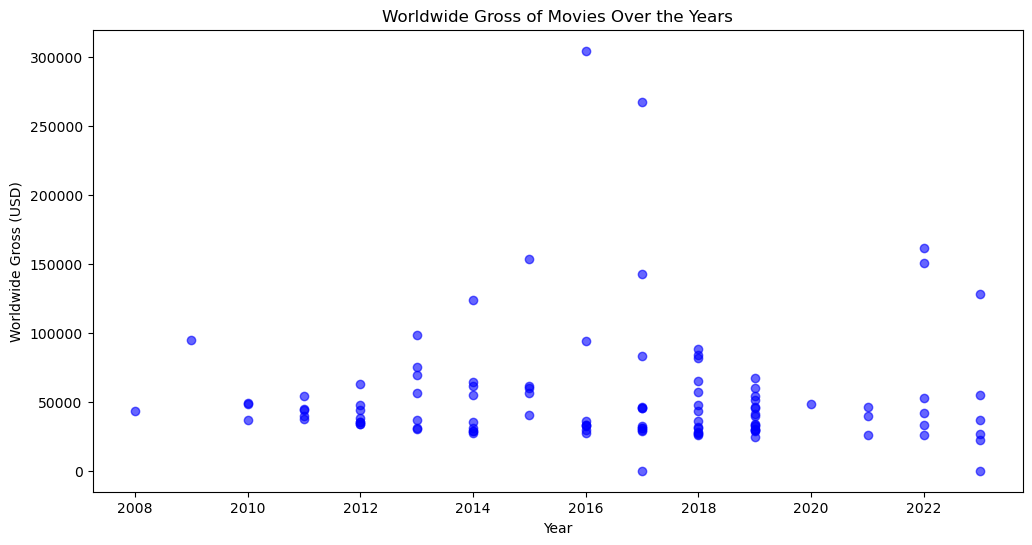

In [70]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_indian['Year'], df_indian['worldwide_gross'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of Movies Over the Years')

# Show the plot
plt.show()


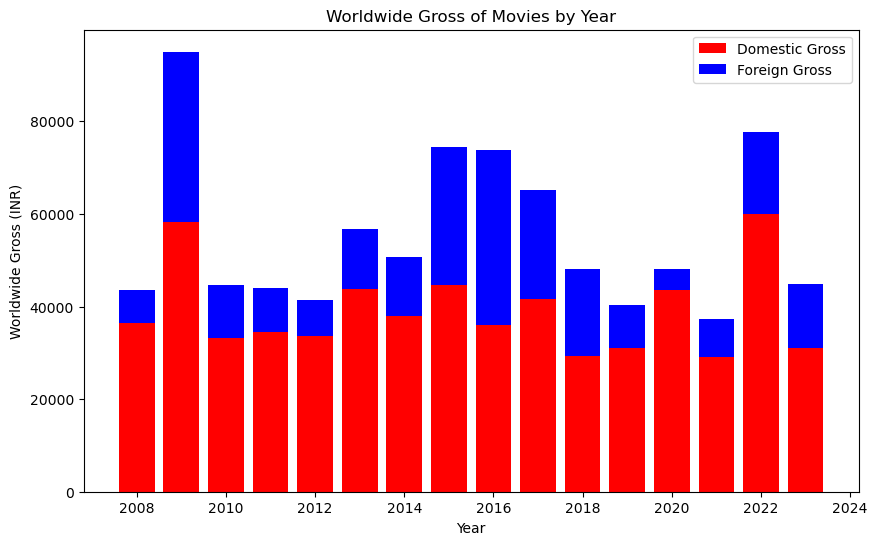

In [71]:
# First, group the data by 'Year' and calculate the sum for each year
yearly_data = df_indian.groupby('Year')[['domestic_gross', 'foreign_gross']].mean()

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['domestic_gross'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['foreign_gross'], bottom=yearly_data['domestic_gross'], color='blue', label='Foreign Gross')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Worldwide Gross (INR)')
plt.title('Worldwide Gross of Movies by Year')
plt.legend()

# Display the plot
plt.show()


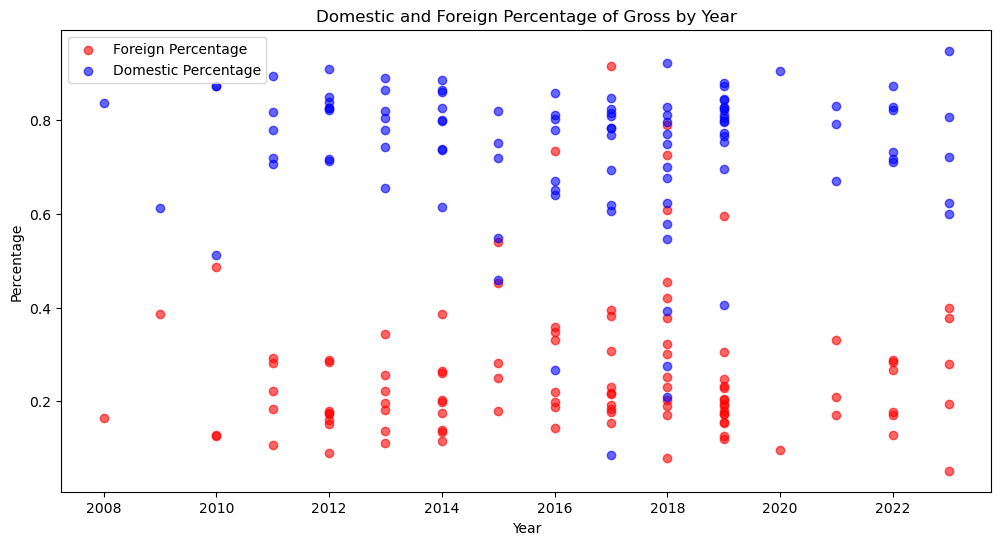

In [72]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot foreign_percentage in red
plt.scatter(df_indian['Year'], df_indian['foreign_percentage'], color='red', label='Foreign Percentage', alpha=0.6)

# Plot domestic_percentage in blue
plt.scatter(df_indian['Year'], df_indian['domestic_percentage'], color='blue', label='Domestic Percentage', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()

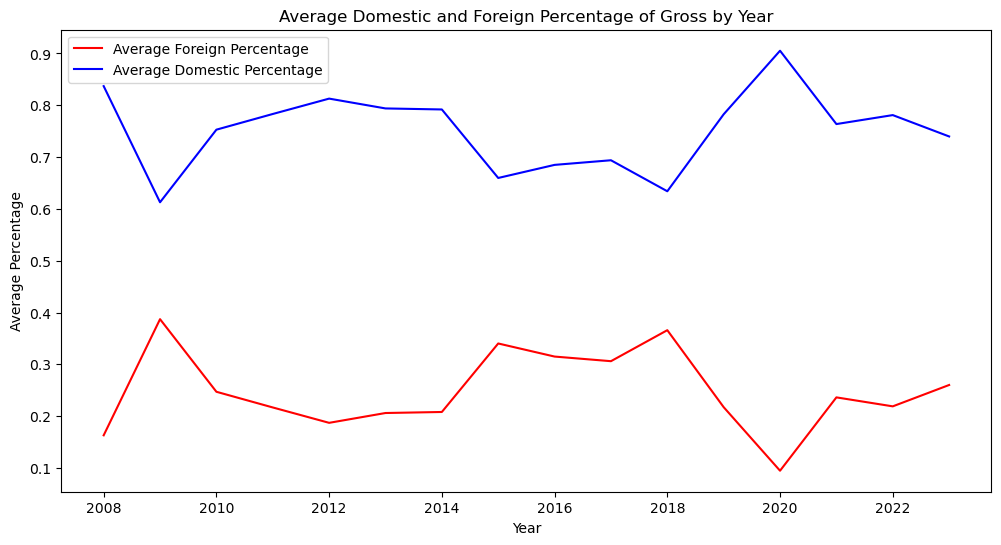

In [73]:
# Calculate the average foreign and domestic percentages for each year
average_percentages = df_indian.groupby('Year')[['foreign_percentage', 'domestic_percentage']].mean()

# Plot the averages
plt.figure(figsize=(12, 6))

# Plot foreign_percentage as a red line
plt.plot(average_percentages.index, average_percentages['foreign_percentage'], color='red', label='Average Foreign Percentage')

# Plot domestic_percentage as a blue line
plt.plot(average_percentages.index, average_percentages['domestic_percentage'], color='blue', label='Average Domestic Percentage')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

# Show the plot
plt.show()
